In [1]:
import requests
from IPython.display import JSON
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from sqlite3 import Error
import seaborn as sns

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
df_fs = pd.read_csv("fs_restaurant_info.csv")

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [3]:
# using this function, we can find out to see if we have any values that doesn't make any sense.
df_fs.describe()

,Unnamed: 0,popularity,price,rating,latitude,longitude,distance,bikes
count,11389.000000,11056.000000,10255.000000,9695.000000,11389.000000,11389.000000,11389.000000,11389.000000
mean,23.865396,0.942007,1.758069,7.938711,49.272339,-123.115476,629.997015,8.908157
std,14.314646,0.100450,0.719261,0.843863,0.010690,0.027636,269.284913,4.193531
min,0.000000,0.000155,1.000000,4.800000,49.231043,-123.203325,0.000000,0.000000
25%,11.000000,0.941223,1.000000,7.500000,49.263852,-123.133591,441.000000,6.000000
50%,24.000000,0.963722,2.000000,8.100000,49.271549,-123.116760,655.000000,8.000000
75%,36.000000,0.980815,2.000000,8.600000,49.281316,-123.100739,841.000000,11.000000
max,49.000000,0.999671,4.000000,9.200000,49.312660,-123.045653,5156.000000,24.000000


In [4]:
print(df_fs.shape)

(11389, 13)


In [5]:
df_clean = df_fs
df_clean

,Unnamed: 0,name,popularity,price,rating,categories_name,latitude,longitude,distance,credit_card,beer,outdoor_seating,bikes
0,0,Hokkaido Ramen Santouka,0.984303,NaN,8.7,Ramen Restaurant,49.263102,-123.116677,186,True,NaN,NaN,15
1,1,Rogue Kitchen & Wetbar,0.980815,3.0,8.8,Bar,49.263123,-123.117652,250,True,True,True,15
2,2,Elysian Coffee Broadway,0.979981,1.0,8.6,Coffee Shop,49.263133,-123.117248,225,True,NaN,True,15
3,3,Aperture Coffee Bar,0.927561,1.0,8.7,Café,49.263286,-123.110286,299,True,NaN,False,15
4,4,Milano Coffee,0.954459,2.0,8.8,Coffee Shop,49.263703,-123.108618,430,True,NaN,True,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,45,Antojos y Sabores,0.820666,1.0,NaN,Mexican Restaurant,49.267320,-123.141129,933,True,NaN,NaN,9
11385,46,Mon Pitou Bistro & Bakery,0.950758,1.0,NaN,Café,49.265415,-123.135820,936,NaN,NaN,NaN,9
11386,47,Glitch Vancouver,0.964575,2.0,NaN,Bar,49.264144,-123.156990,961,True,True,NaN,9
11387,48,Best Falafel,0.815530,1.0,NaN,Falafel Restaurant,49.268223,-123.146961,970,NaN,NaN,NaN,9


In [6]:
#get the minimum distance for each restaurant to the closest bike station
df_clean = df_clean.sort_values(by=['distance'])
df_clean

,Unnamed: 0,name,popularity,price,rating,categories_name,latitude,longitude,distance,credit_card,beer,outdoor_seating,bikes
11226,28,Kosoo Restaurant,0.965234,2.0,7.3,Asian Restaurant,49.289136,-123.132446,0,NaN,NaN,NaN,13
9046,0,Breka Bakery & Cafe,0.995233,2.0,8.5,Bakery,49.285801,-123.127050,8,True,NaN,True,11
7926,9,Fife Bakery,0.944304,1.0,7.7,Bakery,49.268109,-123.103153,8,NaN,NaN,NaN,10
5572,36,The Lunch Lady,0.983431,2.0,NaN,Vietnamese Restaurant,49.274972,-123.069257,8,NaN,NaN,NaN,6
500,0,Meat & Bread,0.981861,2.0,9.0,American Restaurant,49.287210,-123.118896,9,True,NaN,True,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,34,Joe's Grill,0.846246,2.0,7.7,Diner,49.257995,-123.100832,3793,True,NaN,True,6
7059,37,Joe's Grill,0.846246,2.0,7.7,Diner,49.257995,-123.100832,3804,True,NaN,True,9
10965,47,Pho Win,0.306681,2.0,NaN,Vietnamese Restaurant,49.280954,-123.061000,4796,False,NaN,False,8
11058,43,Pho Win,0.306681,2.0,NaN,Vietnamese Restaurant,49.280954,-123.061000,5123,False,NaN,False,4


In [7]:
#drop duplicates
df_clean = df_clean.drop_duplicates(subset=['latitude', 'longitude'], keep = 'first')
df_clean

,Unnamed: 0,name,popularity,price,rating,categories_name,latitude,longitude,distance,credit_card,beer,outdoor_seating,bikes
11226,28,Kosoo Restaurant,0.965234,2.0,7.3,Asian Restaurant,49.289136,-123.132446,0,NaN,NaN,NaN,13
9046,0,Breka Bakery & Cafe,0.995233,2.0,8.5,Bakery,49.285801,-123.127050,8,True,NaN,True,11
7926,9,Fife Bakery,0.944304,1.0,7.7,Bakery,49.268109,-123.103153,8,NaN,NaN,NaN,10
5572,36,The Lunch Lady,0.983431,2.0,NaN,Vietnamese Restaurant,49.274972,-123.069257,8,NaN,NaN,NaN,6
500,0,Meat & Bread,0.981861,2.0,9.0,American Restaurant,49.287210,-123.118896,9,True,NaN,True,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,11,Sushi 7,0.833068,2.0,NaN,Sushi Restaurant,49.254076,-123.114935,1005,NaN,NaN,NaN,6
9969,20,Thai Basil,0.960292,2.0,7.1,Thai Restaurant,49.264335,-123.176954,1181,True,NaN,False,8
6913,31,SalyLimon Mexican,0.942231,1.0,NaN,Mexican Restaurant,49.253823,-123.067783,1422,NaN,NaN,NaN,8
6505,41,Joe's Grill,0.846246,2.0,7.7,Diner,49.257995,-123.100832,3405,True,NaN,True,8


In [8]:
df_clean = df_clean.drop(columns=["Unnamed: 0"])
df_clean

,name,popularity,price,rating,categories_name,latitude,longitude,distance,credit_card,beer,outdoor_seating,bikes
11226,Kosoo Restaurant,0.965234,2.0,7.3,Asian Restaurant,49.289136,-123.132446,0,NaN,NaN,NaN,13
9046,Breka Bakery & Cafe,0.995233,2.0,8.5,Bakery,49.285801,-123.127050,8,True,NaN,True,11
7926,Fife Bakery,0.944304,1.0,7.7,Bakery,49.268109,-123.103153,8,NaN,NaN,NaN,10
5572,The Lunch Lady,0.983431,2.0,NaN,Vietnamese Restaurant,49.274972,-123.069257,8,NaN,NaN,NaN,6
500,Meat & Bread,0.981861,2.0,9.0,American Restaurant,49.287210,-123.118896,9,True,NaN,True,20
...,...,...,...,...,...,...,...,...,...,...,...,...
10698,Sushi 7,0.833068,2.0,NaN,Sushi Restaurant,49.254076,-123.114935,1005,NaN,NaN,NaN,6
9969,Thai Basil,0.960292,2.0,7.1,Thai Restaurant,49.264335,-123.176954,1181,True,NaN,False,8
6913,SalyLimon Mexican,0.942231,1.0,NaN,Mexican Restaurant,49.253823,-123.067783,1422,NaN,NaN,NaN,8
6505,Joe's Grill,0.846246,2.0,7.7,Diner,49.257995,-123.100832,3405,True,NaN,True,8


In [9]:
df_clean.dtypes

name                object
popularity         float64
price              float64
rating             float64
categories_name     object
latitude           float64
longitude          float64
distance             int64
credit_card         object
beer                object
outdoor_seating     object
bikes                int64
dtype: object

In [10]:
df_clean.isnull().sum()

name                 0
popularity         123
price              201
rating             390
categories_name      0
latitude             0
longitude            0
distance             0
credit_card        533
beer               945
outdoor_seating    523
bikes                0
dtype: int64

In [11]:
#Assume restaurants don't have beer, credit card, and outdoor seating values if they are null since they wouldn't fill it in if they dont serve alcohol for example.
df_clean["beer"].fillna(False, inplace = True)
df_clean["credit_card"].fillna(False, inplace = True)
df_clean["outdoor_seating"].fillna(False, inplace = True)

In [12]:
df_clean.isnull().sum()

name                 0
popularity         123
price              201
rating             390
categories_name      0
latitude             0
longitude            0
distance             0
credit_card          0
beer                 0
outdoor_seating      0
bikes                0
dtype: int64

In [13]:
#Fill in the rating, price, and popularity with the mean.
df_clean['rating'].fillna(value=df_clean['rating'].mean(), inplace=True)
df_clean['price'].fillna(value=df_clean['price'].mean(), inplace=True)
df_clean['popularity'].fillna(value=df_clean['popularity'].mean(), inplace=True)

In [14]:
df_clean.isnull().sum()

name               0
popularity         0
price              0
rating             0
categories_name    0
latitude           0
longitude          0
distance           0
credit_card        0
beer               0
outdoor_seating    0
bikes              0
dtype: int64

In [15]:
df_clean

,name,popularity,price,rating,categories_name,latitude,longitude,distance,credit_card,beer,outdoor_seating,bikes
11226,Kosoo Restaurant,0.965234,2.0,7.300000,Asian Restaurant,49.289136,-123.132446,0,False,False,False,13
9046,Breka Bakery & Cafe,0.995233,2.0,8.500000,Bakery,49.285801,-123.127050,8,True,False,True,11
7926,Fife Bakery,0.944304,1.0,7.700000,Bakery,49.268109,-123.103153,8,False,False,False,10
5572,The Lunch Lady,0.983431,2.0,7.617039,Vietnamese Restaurant,49.274972,-123.069257,8,False,False,False,6
500,Meat & Bread,0.981861,2.0,9.000000,American Restaurant,49.287210,-123.118896,9,True,False,True,20
...,...,...,...,...,...,...,...,...,...,...,...,...
10698,Sushi 7,0.833068,2.0,7.617039,Sushi Restaurant,49.254076,-123.114935,1005,False,False,False,6
9969,Thai Basil,0.960292,2.0,7.100000,Thai Restaurant,49.264335,-123.176954,1181,True,False,False,8
6913,SalyLimon Mexican,0.942231,1.0,7.617039,Mexican Restaurant,49.253823,-123.067783,1422,False,False,False,8
6505,Joe's Grill,0.846246,2.0,7.700000,Diner,49.257995,-123.100832,3405,True,False,True,8


In [16]:
df_clean = pd.get_dummies(df_clean, columns=["credit_card","beer","outdoor_seating"])
df_clean

,name,popularity,price,rating,categories_name,latitude,longitude,distance,bikes,credit_card_False,credit_card_True,beer_False,beer_True,outdoor_seating_False,outdoor_seating_True
11226,Kosoo Restaurant,0.965234,2.0,7.300000,Asian Restaurant,49.289136,-123.132446,0,13,1,0,1,0,1,0
9046,Breka Bakery & Cafe,0.995233,2.0,8.500000,Bakery,49.285801,-123.127050,8,11,0,1,1,0,0,1
7926,Fife Bakery,0.944304,1.0,7.700000,Bakery,49.268109,-123.103153,8,10,1,0,1,0,1,0
5572,The Lunch Lady,0.983431,2.0,7.617039,Vietnamese Restaurant,49.274972,-123.069257,8,6,1,0,1,0,1,0
500,Meat & Bread,0.981861,2.0,9.000000,American Restaurant,49.287210,-123.118896,9,20,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,Sushi 7,0.833068,2.0,7.617039,Sushi Restaurant,49.254076,-123.114935,1005,6,1,0,1,0,1,0
9969,Thai Basil,0.960292,2.0,7.100000,Thai Restaurant,49.264335,-123.176954,1181,8,0,1,1,0,1,0
6913,SalyLimon Mexican,0.942231,1.0,7.617039,Mexican Restaurant,49.253823,-123.067783,1422,8,1,0,1,0,1,0
6505,Joe's Grill,0.846246,2.0,7.700000,Diner,49.257995,-123.100832,3405,8,0,1,1,0,0,1


In [17]:
#remove the outliers where distance > 1400
df_clean = df_clean[df_clean["distance"] < 1400]
df_clean

,name,popularity,price,rating,categories_name,latitude,longitude,distance,bikes,credit_card_False,credit_card_True,beer_False,beer_True,outdoor_seating_False,outdoor_seating_True
11226,Kosoo Restaurant,0.965234,2.000000,7.300000,Asian Restaurant,49.289136,-123.132446,0,13,1,0,1,0,1,0
9046,Breka Bakery & Cafe,0.995233,2.000000,8.500000,Bakery,49.285801,-123.127050,8,11,0,1,1,0,0,1
7926,Fife Bakery,0.944304,1.000000,7.700000,Bakery,49.268109,-123.103153,8,10,1,0,1,0,1,0
5572,The Lunch Lady,0.983431,2.000000,7.617039,Vietnamese Restaurant,49.274972,-123.069257,8,6,1,0,1,0,1,0
500,Meat & Bread,0.981861,2.000000,9.000000,American Restaurant,49.287210,-123.118896,9,20,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,Crumb Sandwich Shop,0.614162,1.000000,7.617039,Sandwich Restaurant,49.270155,-123.095783,999,12,1,0,1,0,1,0
8292,Ta Bom Korean Cuisine,0.957017,2.000000,7.617039,Korean Restaurant,49.288953,-123.131882,1000,18,1,0,0,1,1,0
8243,Mean Poutine,0.975485,1.710497,6.500000,Hot Dog Joint,49.279279,-123.123330,1001,17,0,1,1,0,1,0
10698,Sushi 7,0.833068,2.000000,7.617039,Sushi Restaurant,49.254076,-123.114935,1005,6,1,0,1,0,1,0


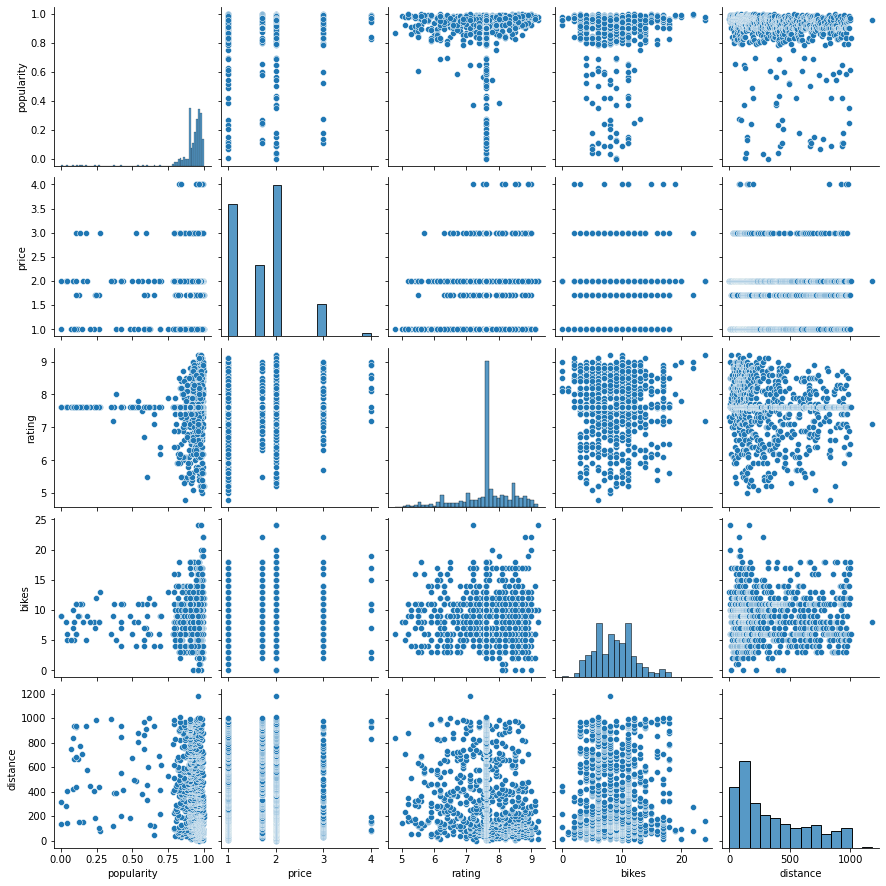

In [18]:
sns.pairplot(df_clean, vars = ["popularity", "price", "rating", "bikes", "distance"])
plt.show()

In [19]:
df_clean.corr()
#highest correlation is outdoor seating and credit card at 0.4049

,popularity,price,rating,latitude,longitude,distance,bikes,credit_card_False,credit_card_True,beer_False,beer_True,outdoor_seating_False,outdoor_seating_True
popularity,1.000000,0.013979,0.067458,0.101111,0.055580,-0.201121,0.060732,-0.249395,0.249395,-0.140143,0.140143,-0.157525,0.157525
price,0.013979,1.000000,0.185972,0.090425,-0.018052,0.015003,0.067411,-0.095107,0.095107,-0.166609,0.166609,-0.049235,0.049235
rating,0.067458,0.185972,1.000000,0.139101,-0.023409,-0.146886,0.004520,-0.116447,0.116447,-0.086429,0.086429,-0.103769,0.103769
latitude,0.101111,0.090425,0.139101,1.000000,0.094934,-0.093628,0.035595,-0.159956,0.159956,-0.183556,0.183556,-0.134786,0.134786
longitude,0.055580,-0.018052,-0.023409,0.094934,1.000000,-0.035743,-0.298849,-0.001856,0.001856,-0.028928,0.028928,0.080437,-0.080437
distance,-0.201121,0.015003,-0.146886,-0.093628,-0.035743,1.000000,-0.014505,0.201459,-0.201459,0.156579,-0.156579,0.158743,-0.158743
bikes,0.060732,0.067411,0.004520,0.035595,-0.298849,-0.014505,1.000000,-0.065433,0.065433,-0.043639,0.043639,-0.041488,0.041488
credit_card_False,-0.249395,-0.095107,-0.116447,-0.159956,-0.001856,0.201459,-0.065433,1.000000,-1.000000,0.254711,-0.254711,0.404999,-0.404999
credit_card_True,0.249395,0.095107,0.116447,0.159956,0.001856,-0.201459,0.065433,-1.000000,1.000000,-0.254711,0.254711,-0.404999,0.404999
beer_False,-0.140143,-0.166609,-0.086429,-0.183556,-0.028928,0.156579,-0.043639,0.254711,-0.254711,1.000000,-1.000000,0.181374,-0.181374


<AxesSubplot:>

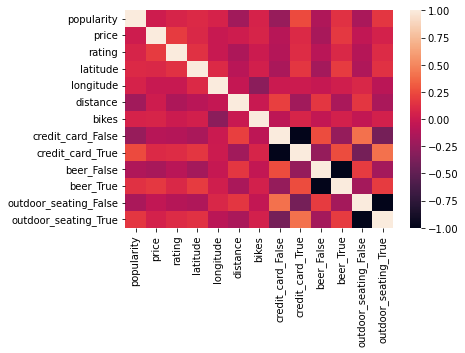

In [20]:
sns.heatmap(df_clean.corr())

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [21]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection


In [22]:
conn = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [23]:
restaurant_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  popularity FLOAT,
  price FLOAT,
  rating FLOAT,
  categories_name TEXT,
  latitude FLOAT NOT NULL,
  longitude FLOAT NOT NULL,
  distance INTEGER NOT NULL,
  credit_card BOOL,
  beer BOOL,
  outdoor_seating BOOL,
  bikes INTEGER
);
"""
conn.execute(restaurant_table)

In [24]:
table_name = "restaurant"
df_clean.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [25]:
connection = sqlite3.connect("sm_app.sqlite")
crsr = connection.cursor()
crsr.execute("SELECT COUNT(*) FROM restaurant")

In [26]:
restaurant_sql = crsr.fetchall()

In [27]:
# Number of restaurants in SQLite
print(restaurant_sql[0][0])

1103


In [30]:

# Number of restaurants in DataFrame
print(len(df_clean))


1103


In [32]:
print(restaurant_sql[0][0]==len(df_clean))


True
